In [1]:
import datacleaner
import config
import os
import sys
import pandas as pd
import numpy as np
from fbprophet import Prophet
import fbprophet

# Reading files to compose stores dataframe for each variable (sales and clients)

In [3]:
df_274_sales = datacleaner.get_Dataframes(274,'s')
df_432_sales = datacleaner.get_Dataframes(432,'s')
df_274_cli = datacleaner.get_Dataframes(274,'c')
df_432_cli = datacleaner.get_Dataframes(432,'c')

In [4]:
# resetting index

df_274_sales.reset_index(inplace=True)
df_432_sales.reset_index(inplace=True)
df_274_cli.reset_index(inplace=True)
df_432_cli.reset_index(inplace=True)

# Initializing and fitting models
   #### Parameters:
   + growth: linear/logistic
   + seasonality: additive/multiplicative
   + holidays:
   + changepoints:

In [6]:
path = getattr(config,'path','default_value')
old_stdout = sys.stdout
sys.stdout = open(path+'/logs/sisqual_monthly_jupyter.log', 'w')
m_274_sale = Prophet()
m_274_cli = Prophet()
m_432_sale = Prophet()
m_432_cli = Prophet()

m_274_sale.fit(df_274_sales)
m_274_cli.fit(df_274_cli)
m_432_sale.fit(df_432_sales)
m_432_cli.fit(df_432_cli)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Creating future dataframe of 30 days
    Future for 274 sales

In [7]:
future_274_sale = m_274_sale.make_future_dataframe(periods=30)
future_274_sale.tail()

ds
117 2020-06-26
118 2020-06-27
119 2020-06-28
120 2020-06-29
121 2020-06-30

    Future for 274 clients

In [8]:
future_274_cli = m_274_cli.make_future_dataframe(periods=30)
future_274_cli.tail()

ds
117 2020-06-26
118 2020-06-27
119 2020-06-28
120 2020-06-29
121 2020-06-30

    Future for 432 sales

In [9]:
future_432_sale = m_432_sale.make_future_dataframe(periods=30)
future_432_sale.tail()

ds
117 2020-06-26
118 2020-06-27
119 2020-06-28
120 2020-06-29
121 2020-06-30

    Future for 432 clients

In [10]:
future_432_cli = m_432_cli.make_future_dataframe(periods=30)
future_432_cli.tail()

ds
117 2020-06-26
118 2020-06-27
119 2020-06-28
120 2020-06-29
121 2020-06-30

## Predicting future for the above created dataframes
    Sales prediction for store 274

In [11]:
forecast_274_sales = m_274_sale.predict(future_274_sale)
forecast_274_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower    yhat_upper
117 2020-06-26  6536.971152  3570.444244   9559.079061
118 2020-06-27  7148.789159  4308.865701  10128.729331
119 2020-06-28  3376.022183   348.111543   6369.462256
120 2020-06-29  3506.113031   682.383911   6493.119397
121 2020-06-30  4584.484767  1771.439567   7394.459423

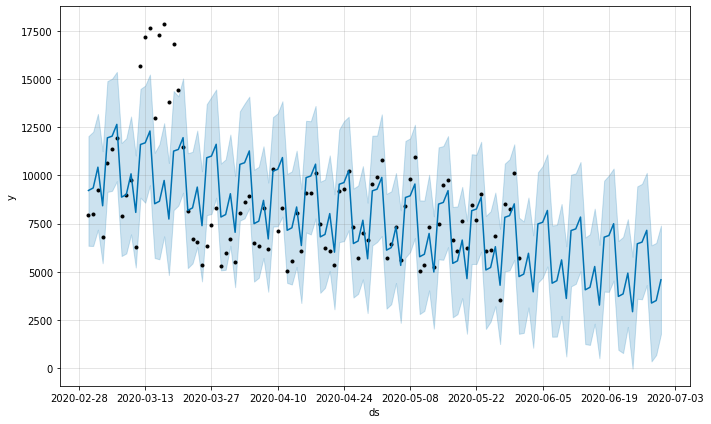

In [12]:
# Plotting the forecasted model and the components

fig_forecast_274_sale = m_274_sale.plot(forecast_274_sales)

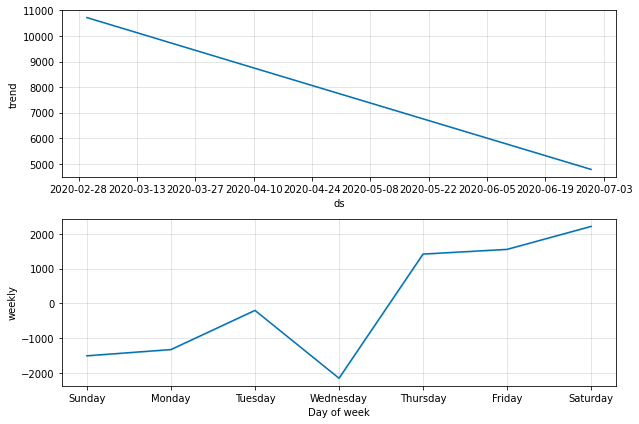

In [13]:
fig_comp_forecast_274_sale = m_274_sale.plot_components(forecast_274_sales)

In [26]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig_plotly_forecast_274_sale = plot_plotly(m_274_sale, forecast_274_sales)  # This returns a plotly Figure
py.iplot(fig_plotly_forecast_274_sale)

## Detecting changing points

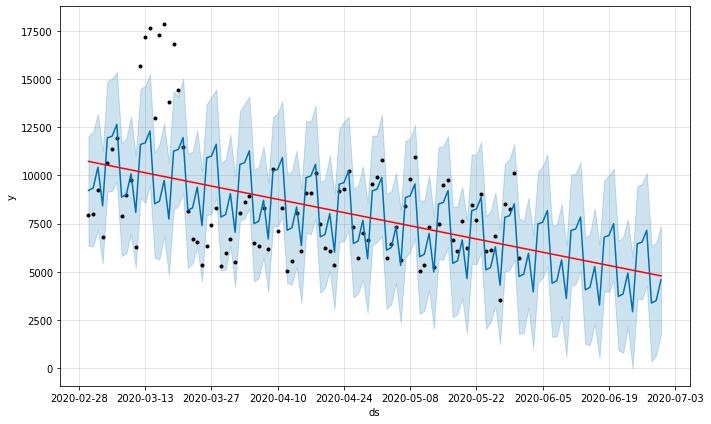

In [36]:
from fbprophet.plot import add_changepoints_to_plot
fig_274_sale_changepoint = m_274_sale.plot(forecast_274_sales)
a = add_changepoints_to_plot(fig_274_sale_changepoint.gca(), m_274_sale, forecast_274_sales)

    Clients prediction for store 274

In [14]:
forecast_274_cli = m_274_cli.predict(future_274_cli)
forecast_274_cli[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
117 2020-06-26  541.018417  385.956487  678.102292
118 2020-06-27  527.895919  389.528642  673.388432
119 2020-06-28  316.798353  165.851592  459.928583
120 2020-06-29  425.324762  287.285048  578.346689
121 2020-06-30  472.630146  312.512443  617.117281

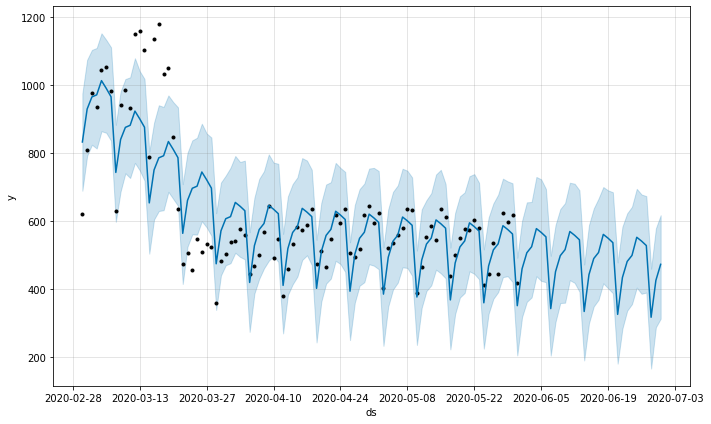

In [15]:
# Plotting the forecasted model and the components

fig_forecast_274_cli = m_274_cli.plot(forecast_274_cli)

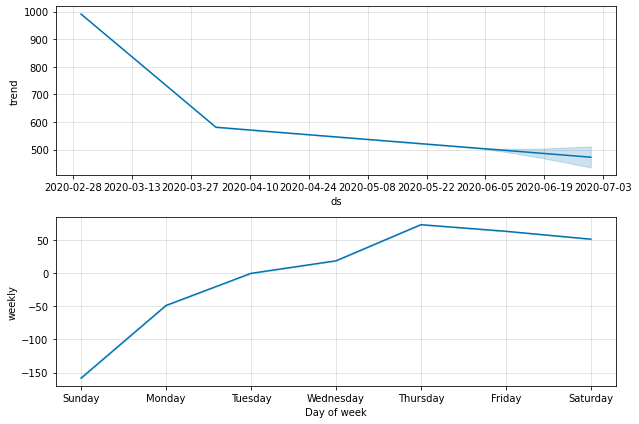

In [16]:
fig_comp_forecast_274_cli = m_274_cli.plot_components(forecast_274_cli)

In [27]:
fig_plotly_forecast_274_cli = plot_plotly(m_274_cli, forecast_274_cli)  # This returns a plotly Figure
py.iplot(fig_plotly_forecast_274_cli)

    Sales prediction for store 432

In [17]:
forecast_432_sales = m_432_sale.predict(future_432_sale)
forecast_432_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
117 2020-06-26  3724.428605  2599.921071  4709.815680
118 2020-06-27  4541.738225  3417.867331  5667.289927
119 2020-06-28  2752.509257  1630.481077  3890.835204
120 2020-06-29  2622.397747  1602.810374  3696.385663
121 2020-06-30  2934.232918  1733.936000  3975.434755

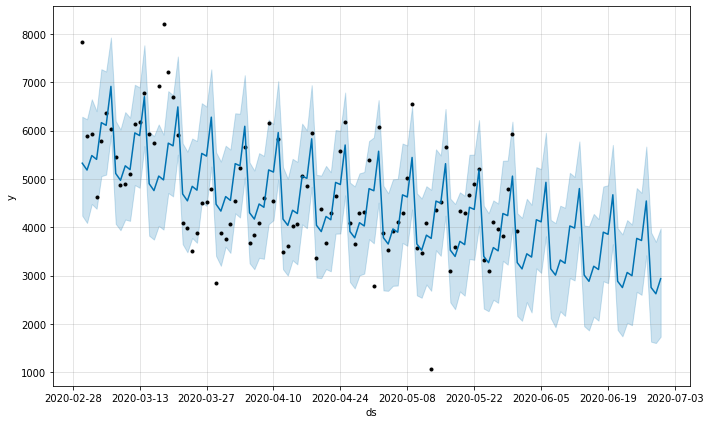

In [18]:
# Plotting the forecasted model and the components

fig_forecast_432_sale = m_432_sale.plot(forecast_432_sales)

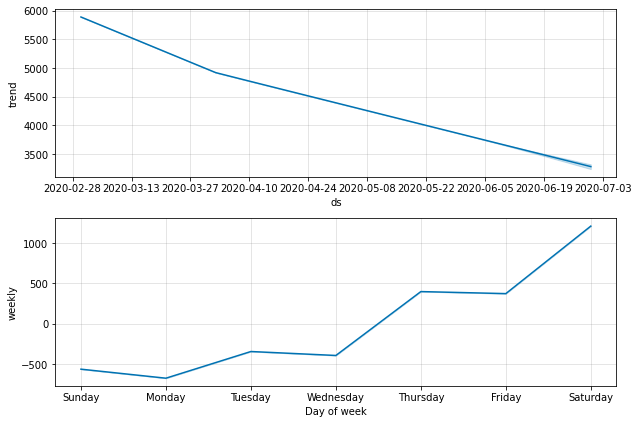

In [19]:
fig_comp_forecast_432_sale = m_432_sale.plot_components(forecast_432_sales)

In [28]:
fig_plotly_forecast_432_sale = plot_plotly(m_432_sale, forecast_432_sales)  # This returns a plotly Figure
py.iplot(fig_plotly_forecast_432_sale)

    Clients prediction for store 432

In [20]:
forecast_432_cli = m_432_cli.predict(future_432_cli)
forecast_432_cli[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
117 2020-06-26  491.638988  387.300991  592.496742
118 2020-06-27  542.443614  441.506179  644.675641
119 2020-06-28  365.446937  272.289207  467.953165
120 2020-06-29  394.861970  291.767869  488.248469
121 2020-06-30  425.520117  326.094416  528.081520

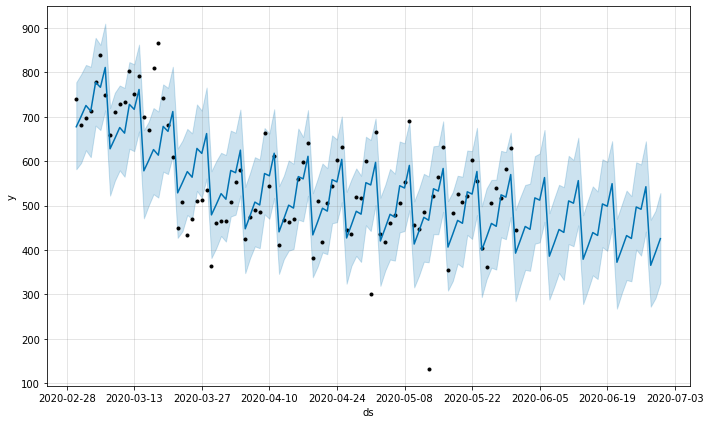

In [21]:
# Plotting the forecasted model and the components

fig_forecast_432_cli = m_432_cli.plot(forecast_432_cli)

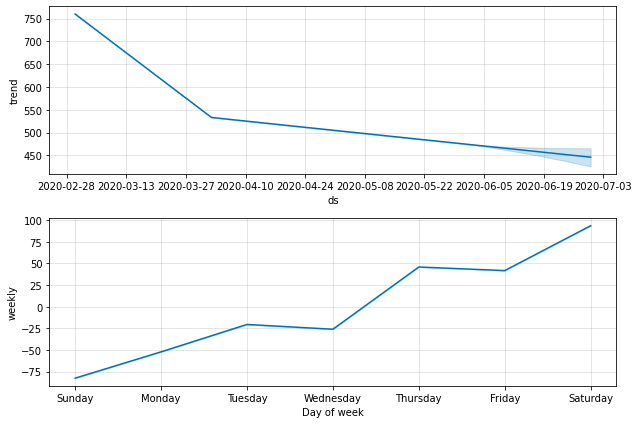

In [22]:
fig_comp_forecast_432_cli = m_432_cli.plot_components(forecast_432_cli)

In [29]:
fig_plotly_forecast_432_cli = plot_plotly(m_432_cli, forecast_432_cli)  # This returns a plotly Figure
py.iplot(fig_plotly_forecast_432_cli)

# Create Holydays
    TODO

# Analysing Seasonality
    Sales 274

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


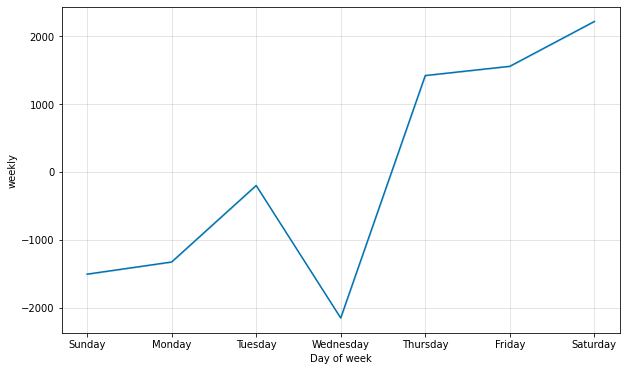

In [30]:
from fbprophet.plot import plot_weekly
m_274_sales_weekly = Prophet().fit(df_274_sales)
a = plot_weekly(m_274_sales_weekly)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


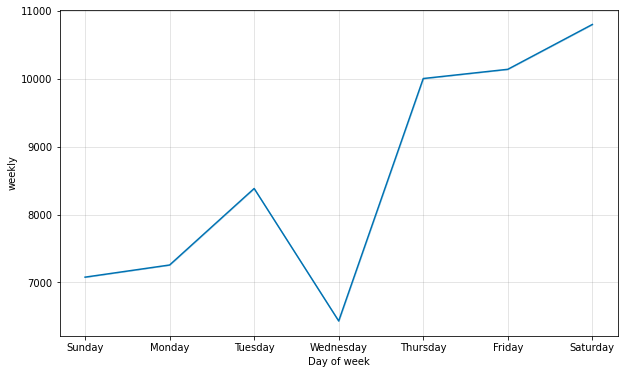

In [33]:
m_274_sales_weekly = Prophet(weekly_seasonality=8).fit(df_274_sales)
a = plot_weekly(m_274_sales_weekly)

## Specifying Custom Seasonalities

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


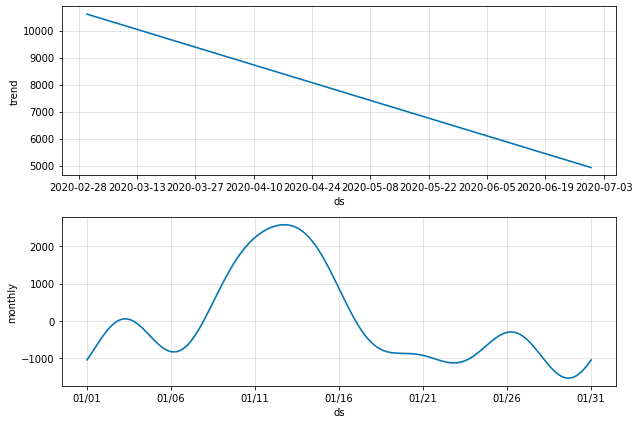

In [35]:
m_seasonality_274_sales = Prophet(weekly_seasonality=False)
m_seasonality_274_sales.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast_seasonality_274_sales = m_seasonality_274_sales.fit(df_274_sales).predict(future_274_sale)
fig_forecast_seasonality_274_sales = m_seasonality_274_sales.plot_components(forecast_seasonality_274_sales)